In [16]:
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction

from Objects import TF_object
from numpy_utils import converters

In [17]:
num=[1]
den=[1, 1.5, 1]
tf = TransferFunction(num, den)
inertial_object = TF_object(sampling_time=0.1, tf=tf)

In [18]:
inertial_object.reset_history()

conv = converters.to_vector_converter()
for i in range(0, 100):
    ut=0 if i < 20 else 1
    inertial_object.simulate_step(u=conv.convert_any_type(ut))

t = inertial_object.get_timestamps()
y = [yt[0][0] for yt in inertial_object.get_output_hist()]
u = [ut[0][0] for ut in inertial_object.get_input_hist()]

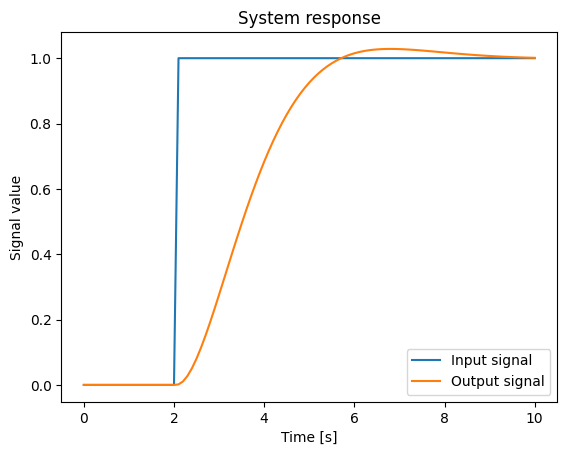

In [19]:
plt.plot(t, u, label='Input signal')
plt.title('System response')
plt.xlabel('Time [s]')
plt.ylabel('Signal value')
plt.plot(t, y, label='Output signal')
sink = plt.legend()

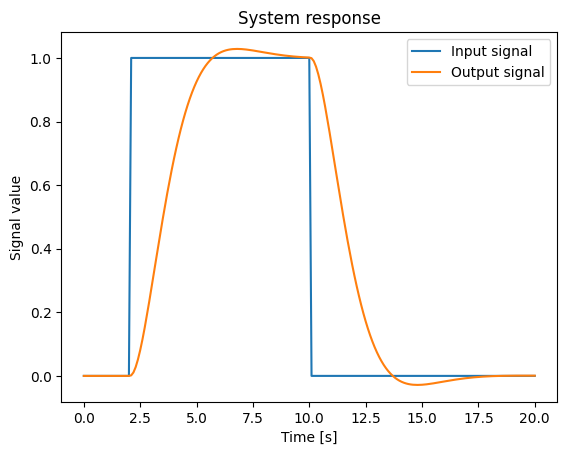

In [20]:
for i in range(0, 100):
    inertial_object.simulate_step(u=conv.convert_any_type(0))

t = inertial_object.get_timestamps()
y = [yt[0][0] for yt in inertial_object.get_output_hist()]
u = [ut[0][0] for ut in inertial_object.get_input_hist()]

plt.plot(t, u, label='Input signal')
plt.title('System response')
plt.xlabel('Time [s]')
plt.ylabel('Signal value')
plt.plot(t, y, label='Output signal')
sink = plt.legend()